In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('to_train.csv')

In [4]:
#df_george = df.loc[df['name'] == 'george']
#df_george.shape

In [5]:
df['name'] = np.where(df['name'] == 'george', 1, 0)

In [6]:
print("Número de observaciones por clase")
print(df['name'].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * df['name'].value_counts(normalize=True))

Número de observaciones por clase
0    2500
1     500
Name: name, dtype: int64

Porcentaje de observaciones por clase
0    83.333333
1    16.666667
Name: name, dtype: float64


In [7]:
# División de los datos en train y test
# ==============================================================================
X = df.drop(columns = 'name')
y = df['name']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 34,
                                        shuffle      = True
                                    )

In [8]:
#división 2
X = df.drop(columns = 'name')
y = df['name']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [10]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge

In [11]:
model = ElasticNet()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7960561773925419

In [12]:
model = Lasso()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
model.coef_

0.6840669526352189


array([ 0.00066577, -0.00295913, -0.00358833, -0.00330744, -0.        ,
       -0.        , -0.        , -0.        , -0.0014529 , -0.        ,
       -0.        , -0.0087617 , -0.        , -0.        , -0.00303208,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

In [13]:
model = Ridge()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
model.coef_

0.8824900860215852


array([ 6.35276757e-05, -1.31296884e-03, -1.05747750e-02,  9.64811249e-03,
       -1.91215636e-02,  2.16300766e-02, -3.25295928e-02,  3.86865496e-02,
       -5.84034143e-02,  5.94199882e-02, -5.84922431e-02,  3.99448094e-02,
       -2.33861621e-02, -1.23900665e-02,  3.01631804e-02, -5.80107761e-02,
        5.84992767e-02, -4.96347827e-02,  1.56806033e-02, -1.03724726e-02])

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
model.coef_

0.8826437128787004


array([ 6.10152649e-05, -1.33055567e-03, -1.06076953e-02,  1.00591198e-02,
       -2.06152367e-02,  2.52193892e-02, -3.93272032e-02,  4.94707420e-02,
       -7.33281363e-02,  7.77525510e-02, -7.86042318e-02,  5.97071767e-02,
       -4.07679414e-02,  1.13423429e-03,  2.10257855e-02, -5.28415082e-02,
        5.62203112e-02, -4.90430746e-02,  1.57714779e-02, -1.05609793e-02])

In [56]:
model = LogisticRegression(max_iter=1000)

In [18]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
model.score(X_test, y_test)

0.9983333333333333

<AxesSubplot:xlabel='name', ylabel='count'>

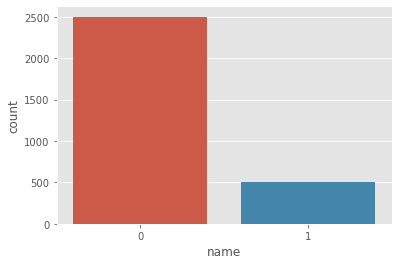

In [20]:
sns.countplot(y)

In [21]:
1 - sum(y) / len(y)

0.8333333333333334

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
y_test

2899    0
2670    0
2774    0
1699    0
1933    0
       ..
2395    0
1634    0
543     0
2671    0
131     0
Name: name, Length: 600, dtype: int32

In [25]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score

In [26]:
precision_score(y_test, y_pred)

1.0

In [27]:
recall_score(y_test, y_pred)

0.9883720930232558

In [28]:
f1_score(y_test, y_pred)

0.9941520467836257

In [29]:
sum(y_test)

86

In [30]:
confusion_matrix(y_test, y_pred)

array([[514,   0],
       [  1,  85]], dtype=int64)

<AxesSubplot:>

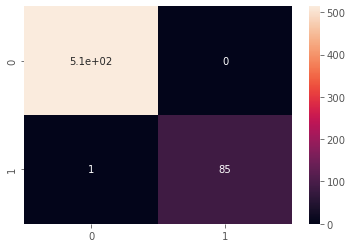

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [32]:
model.coef_

array([[-0.01513764, -0.06288943, -0.13068272, -0.07367746, -0.15437476,
        -0.1027625 , -0.09591031, -0.19552916, -0.25048312, -0.12703731,
        -0.12585365, -0.26018817, -0.14788038, -0.1207081 , -0.33099626,
        -0.15091227,  0.10648747, -0.09256516, -0.13638998,  0.0540971 ]])

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       514
           1       1.00      0.99      0.99        86

    accuracy                           1.00       600
   macro avg       1.00      0.99      1.00       600
weighted avg       1.00      1.00      1.00       600



In [35]:
from sklearn.metrics import auc, roc_curve

In [36]:
p = model.predict_proba(X_test)

In [37]:
X_test

,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19
2899,-361.185608,224.099640,-74.386124,26.900375,35.477524,-32.615807,16.610027,-3.992146,-31.784626,20.127375,0.670310,-22.105301,9.740358,-7.090157,-12.183558,12.488370,-5.912700,-6.787135,7.652180,-9.638283
2670,-445.646210,154.228531,-70.482491,46.975178,43.883823,-62.140144,-13.252985,6.204161,-32.171612,-6.321438,-8.566392,-23.356506,7.462023,1.519496,-13.174471,5.318227,0.493516,-3.060100,5.915523,-8.278802
2774,-319.585663,205.282486,-59.729504,31.432556,37.428776,-34.827110,8.720160,-3.704654,-36.813175,0.970823,-3.782102,-16.176172,-2.676745,-20.364717,-14.352981,-0.924778,-22.073835,-9.298434,1.781609,-21.839695
1699,-323.658569,229.948303,-75.988762,14.471116,12.468710,-51.622307,19.409571,3.076319,-35.856956,12.524756,-2.023012,-17.673622,14.016465,-8.062601,-13.599543,9.859485,-8.823350,-3.717883,11.254442,-10.347220
1933,-390.043213,164.564713,-85.671143,32.009109,50.535133,-40.572746,1.115468,8.565308,-27.554832,6.965716,7.626472,-15.145624,2.573852,-1.738562,-4.356829,12.074589,-1.690861,-4.196858,7.480426,-7.529877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,-471.168152,174.177719,-61.235085,12.727226,30.873041,-36.746826,-5.208332,-3.956880,-33.039265,4.546687,7.894004,-20.314005,-3.749267,3.017381,-4.958826,-2.270370,-12.108484,-7.399536,5.009678,-10.887519
1634,-343.619965,171.267380,-54.617809,-0.148304,27.777250,-33.313854,-9.178011,10.224354,-17.167723,-1.054875,13.403250,-2.331831,-3.823094,-5.909204,-6.713609,2.038657,-7.509491,-11.357720,3.757999,-0.493978
543,-611.069153,211.668533,-44.132626,23.270361,20.099285,-42.715546,11.445559,9.198569,-25.248800,7.888493,0.211774,-18.186563,5.824899,-1.899836,-8.071268,5.939594,-10.929110,-13.573047,-1.054492,-15.063240
2671,-601.402283,161.805374,-51.573177,48.599865,34.492290,-51.336674,0.444936,1.713896,-31.051743,0.388357,-12.920789,-23.273195,11.818683,-3.499739,-14.663442,9.977845,-0.463602,-6.500505,5.300980,-3.685828


In [38]:
len(p)

600

In [39]:
y_test

2899    0
2670    0
2774    0
1699    0
1933    0
       ..
2395    0
1634    0
543     0
2671    0
131     0
Name: name, Length: 600, dtype: int32

In [40]:
fpr, tpr, th = roc_curve(y_test, p[:,1])

In [41]:
import matplotlib.pyplot as plt

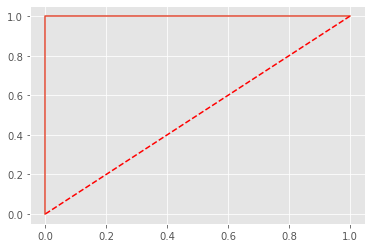

In [42]:
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

In [43]:
auc(fpr, tpr)

1.0

In [44]:
model

LogisticRegression(max_iter=1000)

In [45]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
model.predict(X)

array([1, 1, 1, ..., 0, 0, 0])

In [47]:
model.score(X,y)

0.9996666666666667

In [48]:
help(model.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._logistic.LogisticRegression instance
    Return the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs)
        True labels for `X`.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of ``self.predict(X)`` wrt. `y`.



In [49]:
from sklearn.model_selection import train_test_split

In [50]:
train_test_split(X,y)

[           mfcc0       mfcc1      mfcc2      mfcc3      mfcc4      mfcc5  \
 822  -568.347168  218.266296 -67.570412  40.876629  36.391838 -45.910843   
 1601 -483.545715  105.954353 -35.338161   4.977495  22.661360 -16.457769   
 2084 -492.965363  202.765900 -70.742401  52.098488  55.670368 -54.232430   
 119  -382.735809  202.337784 -43.237995  11.131782  39.439205 -23.350077   
 1144 -524.524292  176.245941 -40.130314  37.753380  45.554436 -35.834465   
 ...          ...         ...        ...        ...        ...        ...   
 2566 -313.154694  173.894531 -63.260025  33.060425  31.729164 -46.678459   
 2334 -532.986328  169.547714 -59.834164  19.304916  23.674158 -40.249222   
 192  -382.479675  208.138519 -55.713219  51.358864  35.341389 -40.123760   
 835  -514.462463  195.108932 -68.727562  43.824471  39.940948 -46.455471   
 237  -499.021851  192.983994 -58.311981   8.648964  33.814091 -28.178589   
 
           mfcc6      mfcc7      mfcc8      mfcc9     mfcc10     mfcc11  \